In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import hashashin
from hashashin.lsh_tests import compute_matrices, print_similarity_matrix, compute_metrics

BINARY_DIR = os.path.join(os.path.dirname(hashashin.__file__), 'binary_data')

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'hashashin.lsh_tests'

In [2]:
def show_similarity_matrix(mat, labels, title=None, font_scale=0.7, figsize=(14, 14)):
    if isinstance(mat, list):
        mat = np.array(mat)
    if isinstance(labels, list):
        labels = np.array(labels)
    sns.set(font_scale=font_scale, rc={'figure.figsize':figsize, 'axes.titlesize': 20})
    sns.heatmap(mat, xticklabels=labels, yticklabels=labels, cmap='Blues', annot=True).set(title=title)

In [8]:
minhash_similarities, jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=True)
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


  0%|          | 0/22 [00:00<?, ?it/s]/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/utils.py:241: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return cache_hash(
100%|██████████| 22/22 [08:52<00:00, 24.20s/it]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [09:45<00:00, 26.60s/it]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [00:16<00:00, 29.12it/s]

Minhash precision: 0.9506172839506173, recall: 1.0, f1: 0.9746835443037974
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


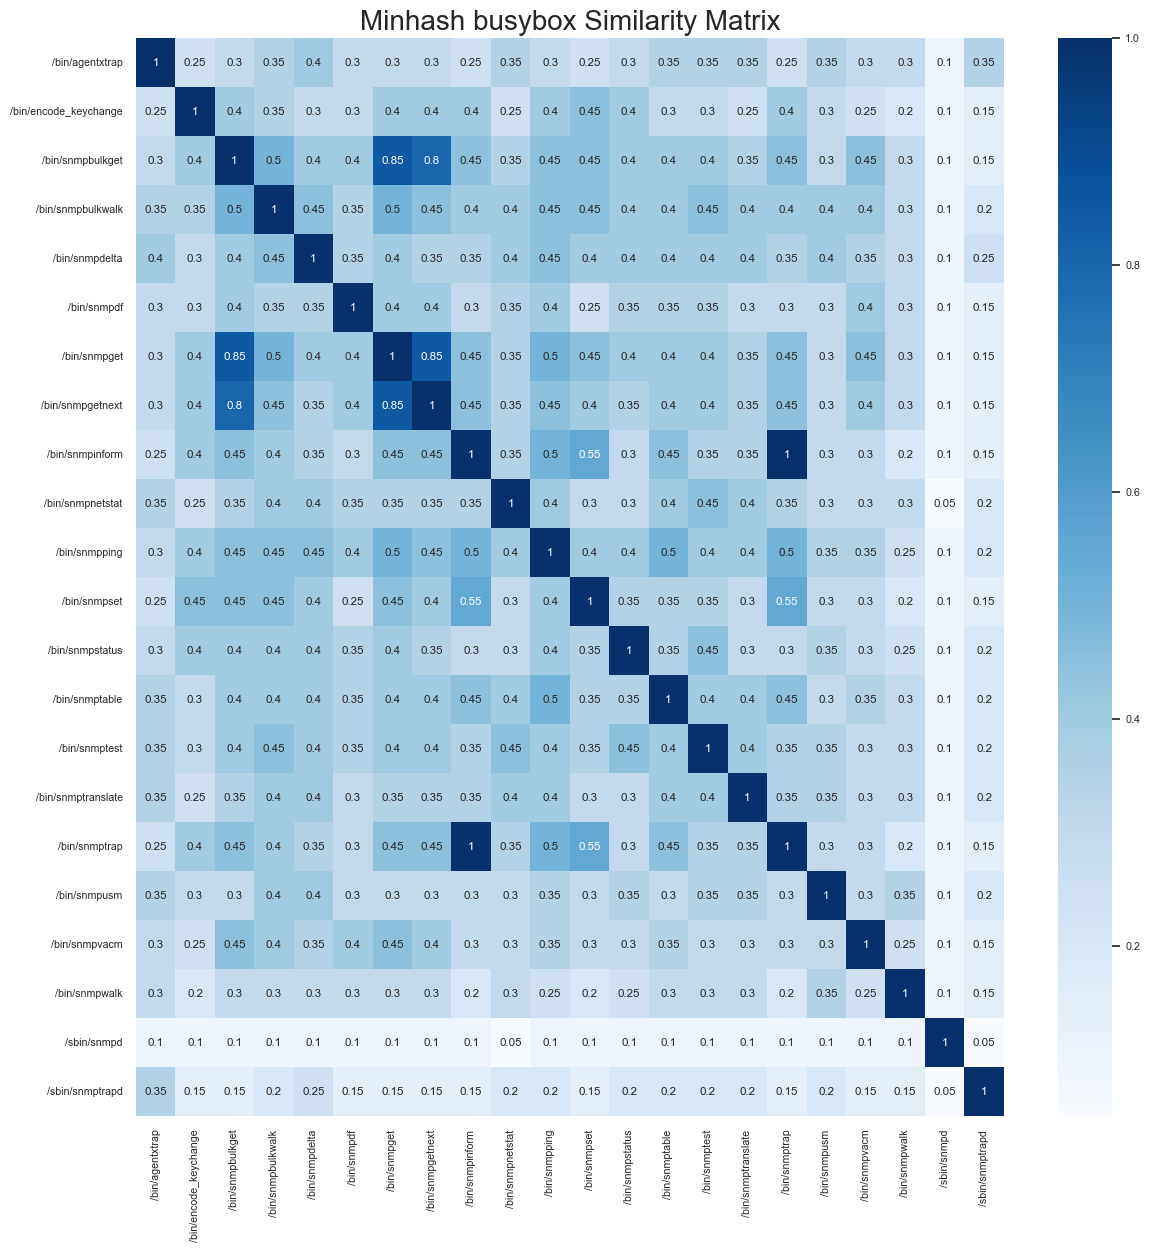

In [9]:
show_similarity_matrix(minhash_similarities, binaries, 'Minhash busybox Similarity Matrix')

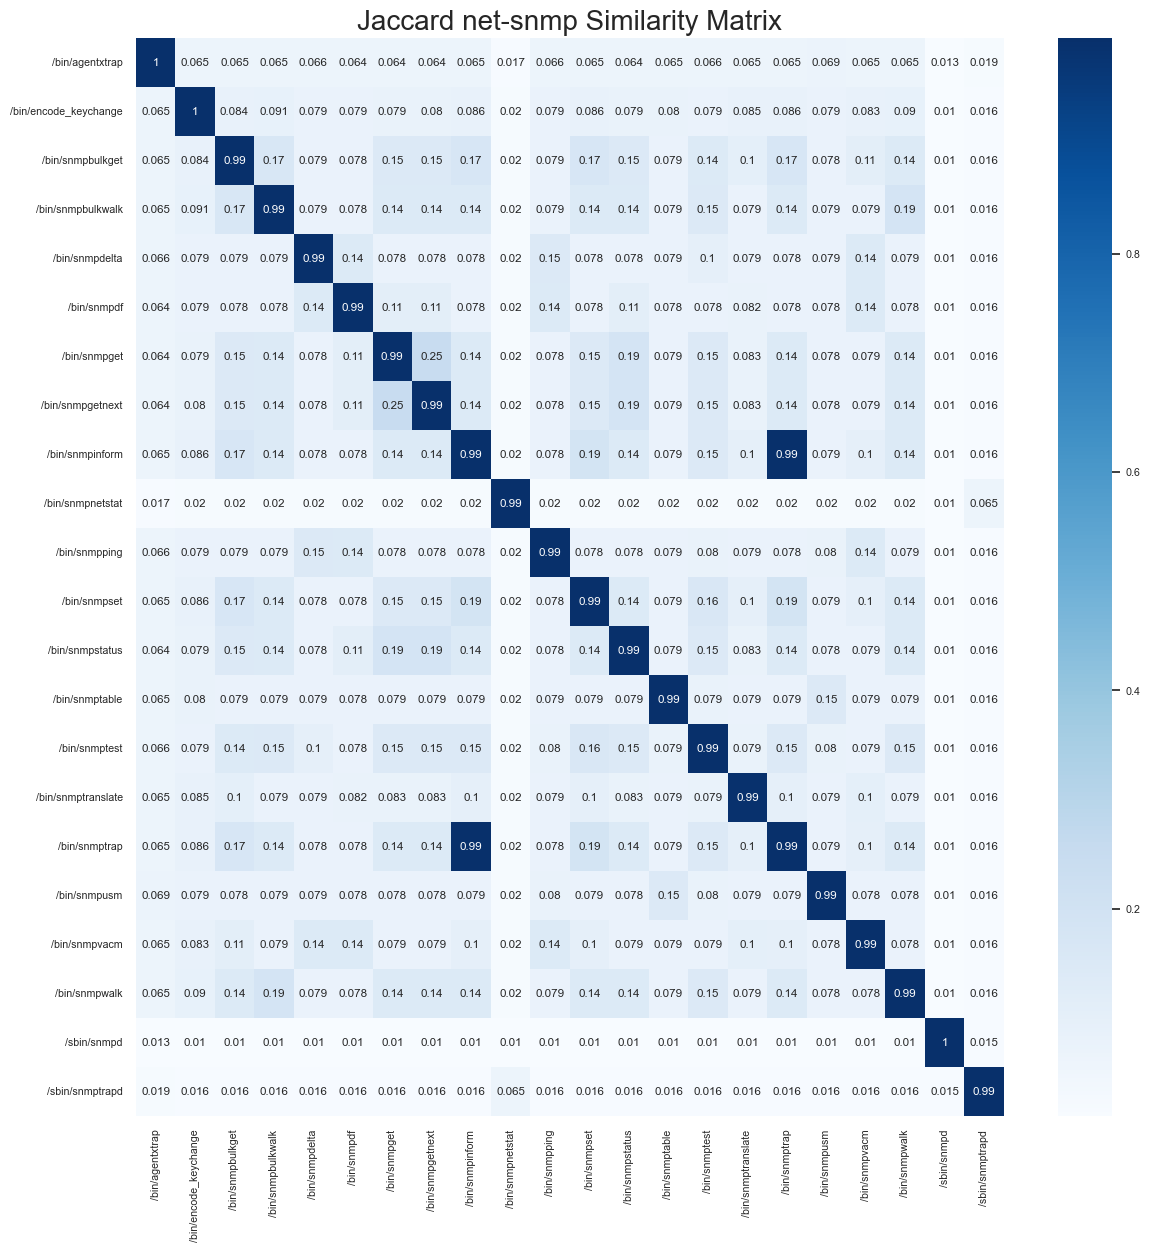

In [10]:
show_similarity_matrix(jaccard_similarities, binaries, 'Jaccard net-snmp Similarity Matrix')

# Dominator signature PCA

In [ ]:
%load_ext autoreload
%autoreload 2
from binaryninja import enums
from hashashin.lsh_test import compute_matrices, compute_metrics

ilen = len(enums.MediumLevelILOperation.__members__)
components = {"cyclomatic_complexity": slice(0, 1),
"num_instructions": slice(1, 2, 1),
"num_strings": slice(2, 3, 1),
"max_string_length": slice(3, 4, 1),
"constants": slice(4, 68, 1),
"strings": slice(68,580, 1),
"histogram": slice(580, 580 + ilen, 1),
"dominator_sig": slice(580+ilen,580+ilen+32, 1)}

dom_minhash_similarities, dom_jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=True, _feature_mask=components["dominator_sig"])
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(dom_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(dom_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)
show_similarity_matrix(dom_jaccard_similarities, binaries, 'Jaccard net-snmp Dom Sig Only Similarity Matrix')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


  0%|          | 0/22 [00:00<?, ?it/s]


FileNotFoundError: Hash file not found: /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3/bin/snmptranslate.hash.json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 36/36 [00:16<00:00,  2.21it/s]


Minhash precision: 1.0, recall: 1.0, f1: 1.0
Jaccard precision: 1.0, recall: 1.0, f1: 1.0


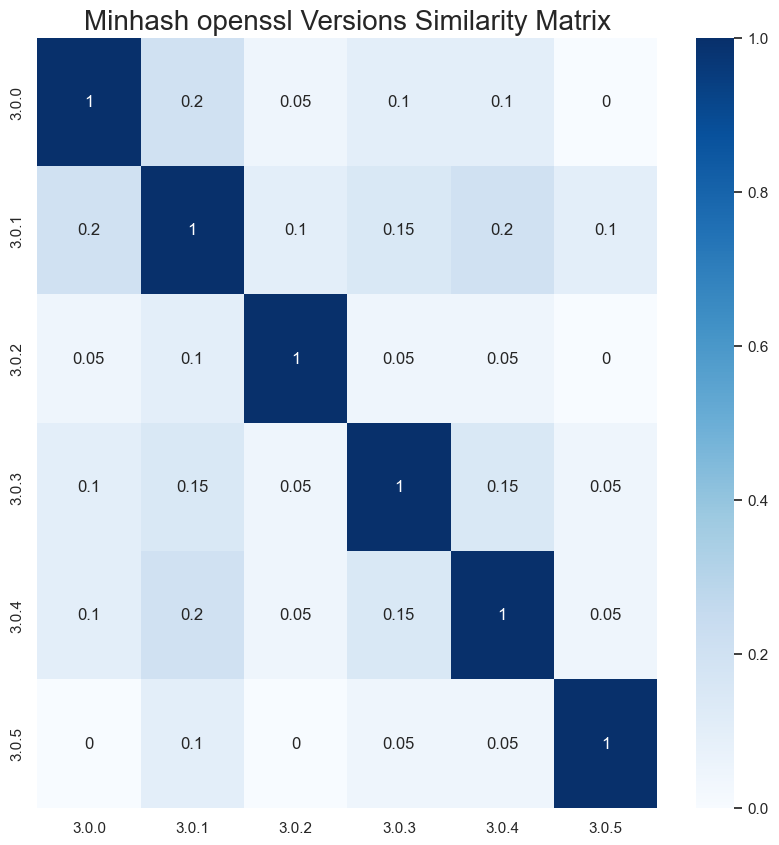

In [5]:
%load_ext autoreload
%autoreload 2
from binaryninja import enums
from hashashin.lsh_test import compute_matrices, compute_metrics, compute_single_bin_matrices

ilen = len(enums.MediumLevelILOperation.__members__)
components = {"cyclomatic_complexity": slice(0, 1),
"num_instructions": slice(1, 2, 1),
"num_strings": slice(2, 3, 1),
"max_string_length": slice(3, 4, 1),
"constants": slice(4, 68, 1),
"strings": slice(68,580, 1),
"histogram": slice(580, 580 + ilen, 1),
"dominator_sig": slice(580+ilen,580+ilen+32, 1)}

openssl_minhash_similarities, openssl_jaccard_similarities, binaries = compute_single_bin_matrices("openssl", "openssl", generate=True, regenerate=False)
minhash_metrics = compute_metrics(openssl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(openssl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

versions = [b.split("openssl-")[1].replace('/bin/openssl', '') for b in binaries]
show_similarity_matrix(openssl_minhash_similarities, versions, 'Minhash openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 36/36 [01:18<00:00,  2.18s/it]


Minhash precision: 1.0, recall: 1.0, f1: 1.0
Jaccard precision: 0.5, recall: 1.0, f1: 0.6666666666666666


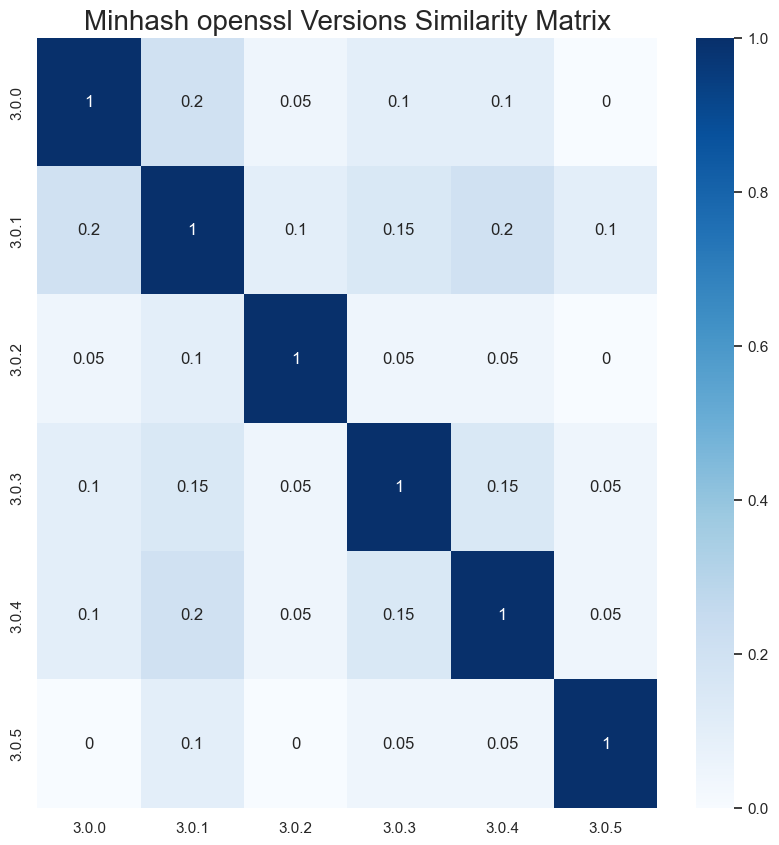

In [5]:
%load_ext autoreload
%autoreload 2
from binaryninja import enums
from hashashin.lsh_test import compute_matrices, compute_metrics, compute_single_bin_matrices

ilen = len(enums.MediumLevelILOperation.__members__)
components = {"cyclomatic_complexity": slice(0, 1),
"num_instructions": slice(1, 2, 1),
"num_strings": slice(2, 3, 1),
"max_string_length": slice(3, 4, 1),
"constants": slice(4, 68, 1),
"strings": slice(68,580, 1),
"histogram": slice(580, 580 + ilen, 1),
"dominator_sig": slice(580+ilen,580+ilen+32, 1)}

openssl_minhash_similarities, openssl_jaccard_similarities, binaries = compute_single_bin_matrices("openssl", "openssl", generate=True, regenerate=False, _feature_mask=components["dominator_sig"])
minhash_metrics = compute_metrics(openssl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(openssl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

versions = [b.split("openssl-")[1].replace('/bin/openssl', '') for b in binaries]
show_similarity_matrix(openssl_minhash_similarities, versions, 'Minhash openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

In [35]:
from hashashin.utils import load_hash

BINARY_DIR = os.path.join(os.path.dirname(hashashin.__file__), 'binary_data')

sig_a, feat_a = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.0/bin/openssl", generate=False, progress=True)
sig_b, feat_b = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.1/bin/openssl", generate=False, progress=True)
sig_c, feat_c = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.2/bin/openssl", generate=False, progress=True)
sig_d, feat_d = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.3/bin/openssl", generate=False, progress=True)
sig_e, feat_e = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.4/bin/openssl", generate=False, progress=True)
sig_f, feat_f = load_hash(f"{BINARY_DIR}/openssl/openssl-3.0.5/bin/openssl", generate=False, progress=True)

In [37]:
# Import the hex2vec function from the hashashin.utils module
from hashashin.utils import hex2vec

# Create sets of values from feat_a and feat_b
a = set(feat_a.values())
b = set(feat_b.values())
c = set(feat_c.values())
d = set(feat_d.values())
e = set(feat_e.values())
f = set(feat_f.values())

# Use map to apply the hex2vec function to each element in the sets,
# and then convert the resulting map objects to lists of NumPy arrays
na = np.array(list(map(hex2vec, a)))
nb = np.array(list(map(hex2vec, b)))
nc = np.array(list(map(hex2vec, c)))
nd = np.array(list(map(hex2vec, d)))
ne = np.array(list(map(hex2vec, e)))
nf = np.array(list(map(hex2vec, f)))

In [38]:
from scipy.spatial.distance import cdist
print('0 vs 1:', np.mean(cdist(na, nb, metric='euclidean')))
print('0 vs 2:', np.mean(cdist(na, nc, metric='euclidean')))
print('0 vs 3:', np.mean(cdist(na, nd, metric='euclidean')))
print('0 vs 4:', np.mean(cdist(na, ne, metric='euclidean')))
print('0 vs 5:', np.mean(cdist(na, nf, metric='euclidean')))

0 vs 1: 5401609203.49761
0 vs 2: 5399272523.552642
0 vs 3: 5401853109.274108
0 vs 4: 5401623657.297457
0 vs 5: 5400219829.230347


In [39]:
from hashashin.utils import load_hash

BINARY_DIR = os.path.join(os.path.dirname(hashashin.__file__), 'binary_data')

sig_curl, feat_curl = load_hash(f"{BINARY_DIR}/libcurl/curl-7_8/bin/curl", generate=True, progress=True)
nn = np.array(list(map(hex2vec, set(feat_curl.values()))))
print('0 vs curl', np.mean(cdist(na, nn, metric='euclidean')))

100%|██████████| 336/336 [00:01<00:00, 277.99it/s] 
/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/utils.py:262: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return cache_hash(


0 vs curl 4039760592.8031945


# Before dominator signature & histogram of instructions

In [9]:
minhash_similarities, jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False)
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


  0%|          | 0/22 [00:00<?, ?it/s]/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/utils.py:228: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return cache_hash(
100%|██████████| 22/22 [09:25<00:00, 25.72s/it]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [09:07<00:00, 24.91s/it]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [00:14<00:00, 33.98it/s]

Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


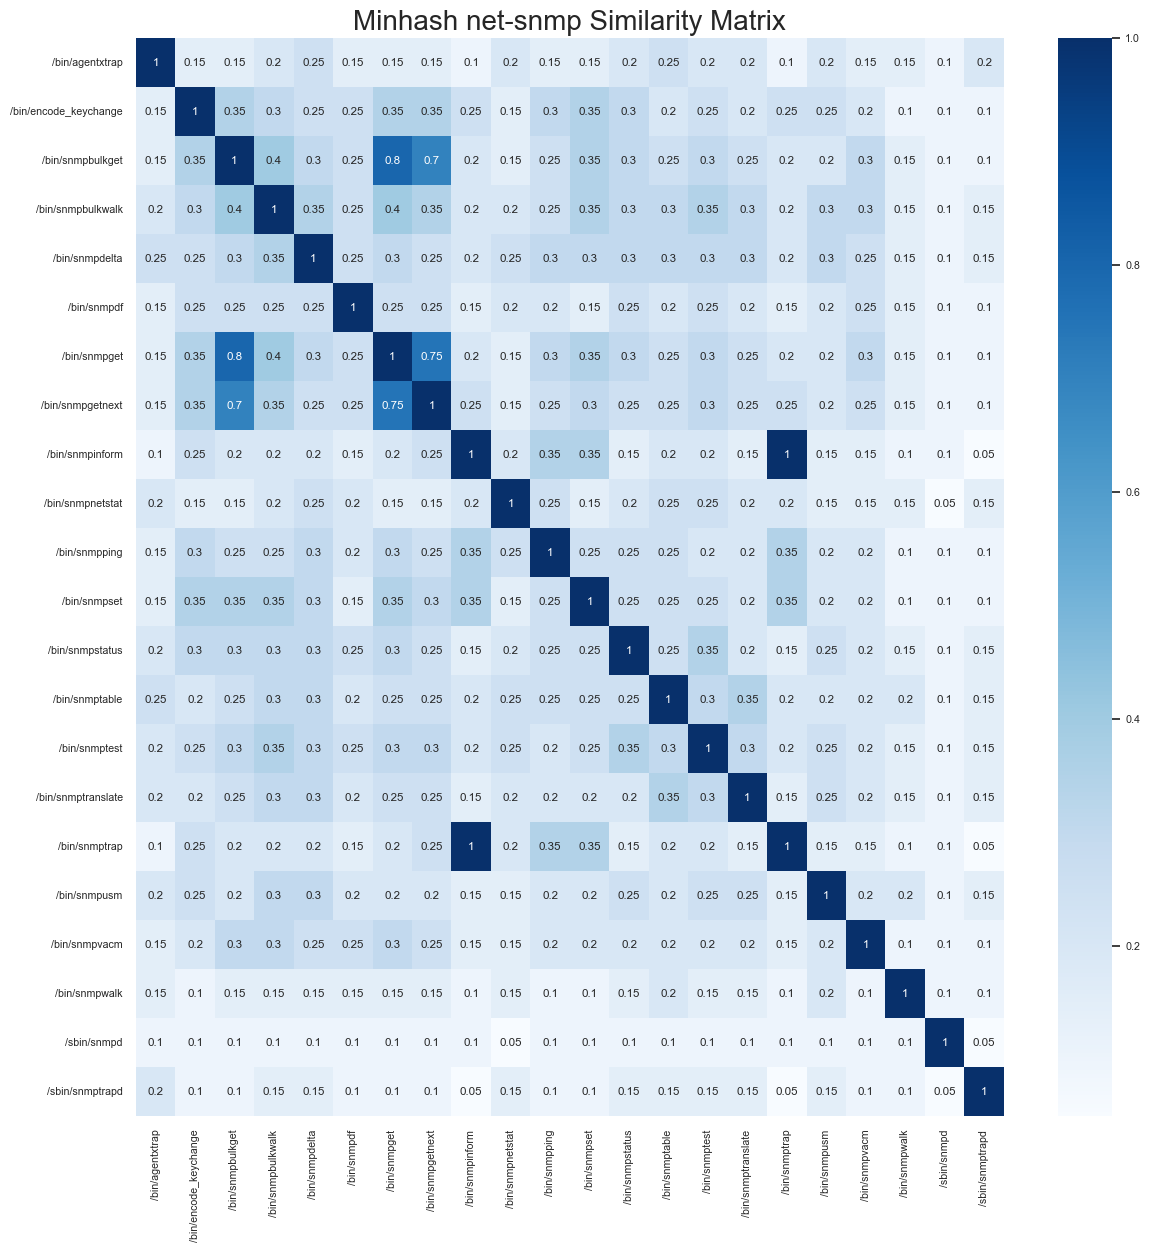

In [10]:
show_similarity_matrix(minhash_similarities, binaries, 'Minhash net-snmp Similarity Matrix')

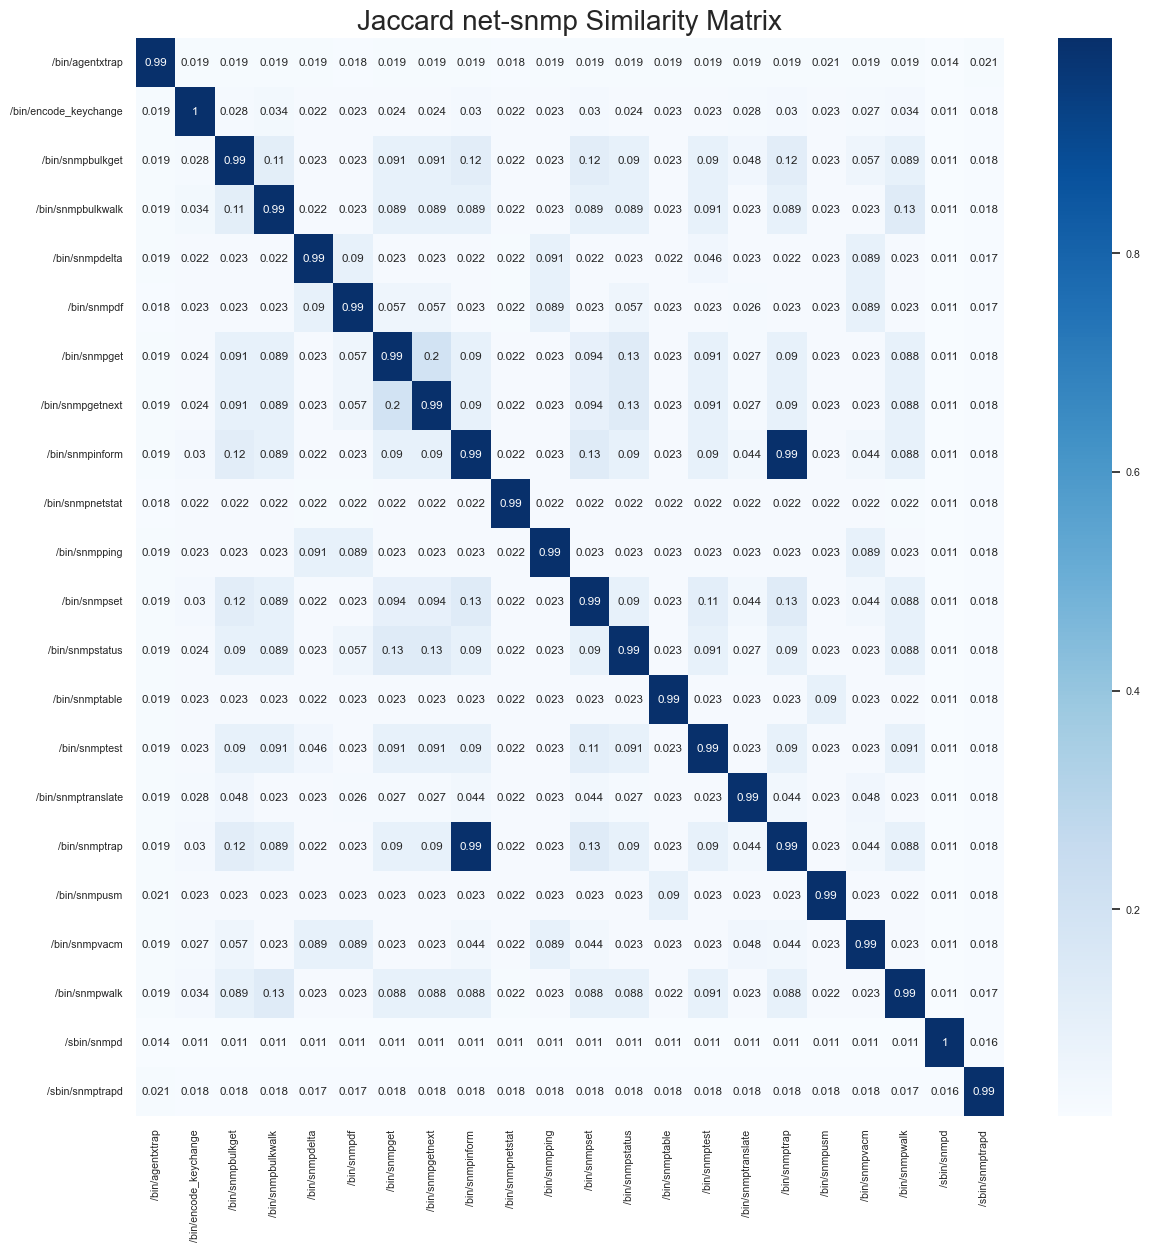

In [11]:
show_similarity_matrix(jaccard_similarities, binaries, 'Jaccard net-snmp Similarity Matrix')

In [55]:
from hashashin.utils import minhash_similarity, jaccard_similarity, load_hash
from tqdm import tqdm

self_minhash_similarities = np.zeros((len(binaries), len(binaries)))
self_jaccard_similarities = np.zeros((len(binaries), len(binaries)))

print(f"Computing similarity matrix for net-snmp:")
print(",".join(binaries))
print()
for i, j in tqdm(
    np.ndindex(len(binaries), len(binaries)), total=len(binaries) ** 2
):
    a = f"{BINARY_DIR}/net-snmp/v5.9.2/{binaries[i]}"
    b = f"{BINARY_DIR}/net-snmp/v5.9.2/{binaries[j]}"
    sig_a, feat_a = load_hash(a, generate=False, progress=False)
    sig_b, feat_b = load_hash(b, generate=False, progress=False)
    self_minhash_similarities[i, j] = minhash_similarity(sig_a, sig_b)
    self_jaccard_similarities[i, j] = jaccard_similarity(feat_a, feat_b)


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [00:11<00:00, 42.49it/s]


In [56]:
minhash_metrics = compute_metrics(self_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(self_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


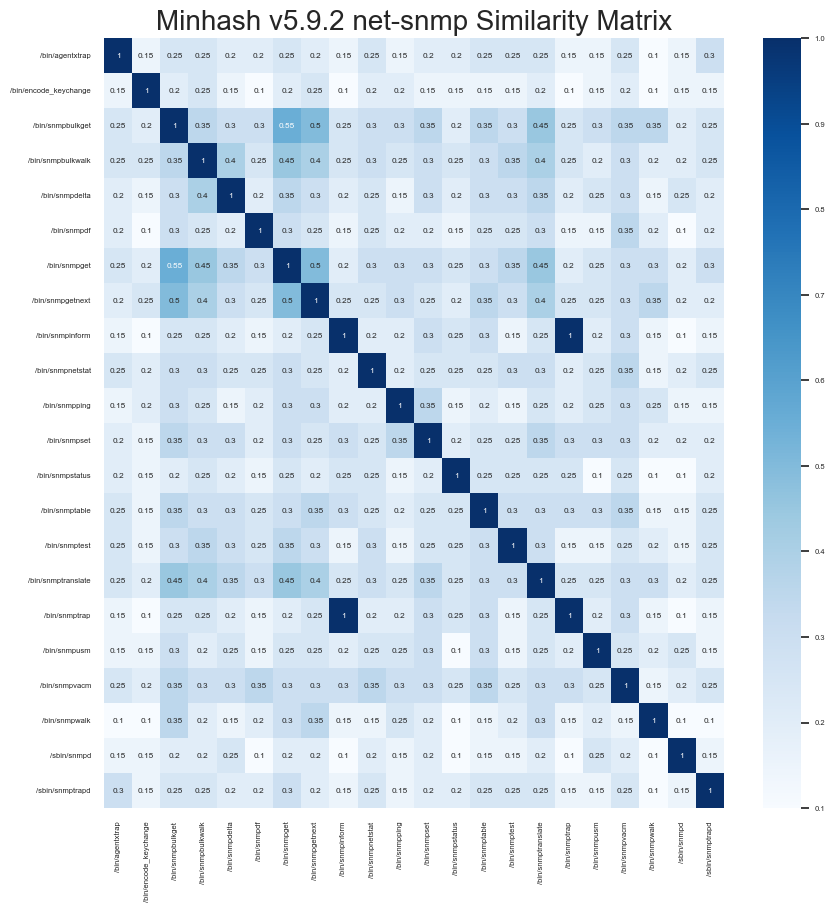

In [18]:
show_similarity_matrix(self_minhash_similarities, binaries, 'Minhash v5.9.2 net-snmp Similarity Matrix')

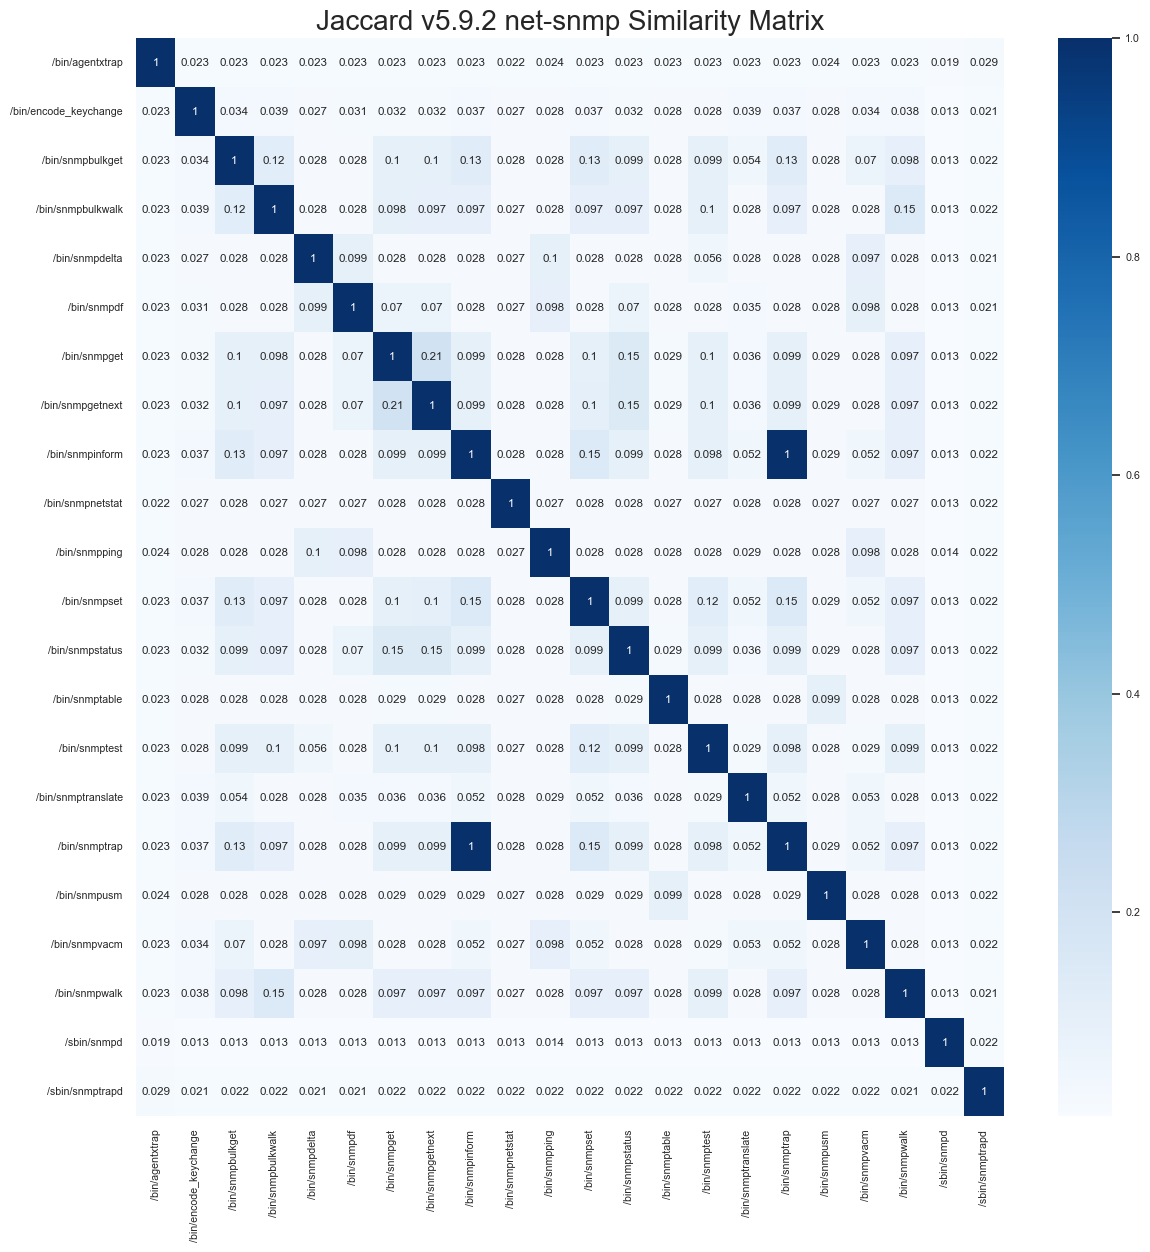

In [23]:
show_similarity_matrix(self_jaccard_similarities, binaries, 'Jaccard v5.9.2 net-snmp Similarity Matrix')

# openssl version comparison

In [46]:
from hashashin.lsh_tests import compute_single_bin_matrices
openssl_minhash_similarities, openssl_jaccard_similarities, binaries = compute_single_bin_matrices("openssl", "openssl", generate=False, regenerate=False)
minhash_metrics = compute_metrics(openssl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(openssl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

100%|██████████| 36/36 [00:07<00:00,  5.13it/s]

Minhash precision: 1.0, recall: 1.0, f1: 1.0
Jaccard precision: 1.0, recall: 1.0, f1: 1.0


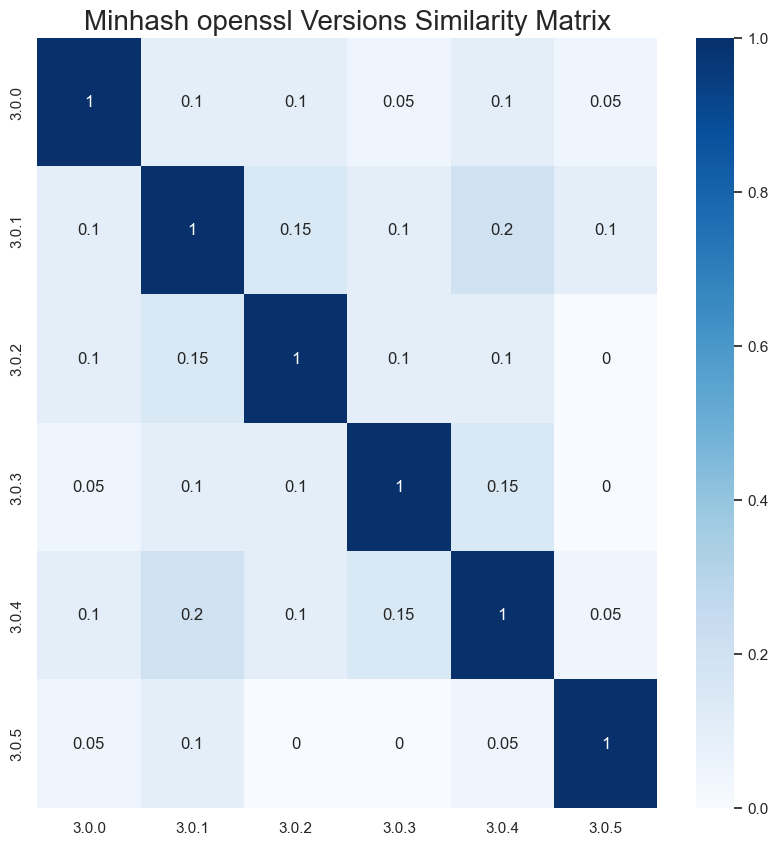

In [50]:
versions = [b.split("openssl-")[1].replace('/bin/openssl', '') for b in binaries]
show_similarity_matrix(openssl_minhash_similarities, versions, 'Minhash openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

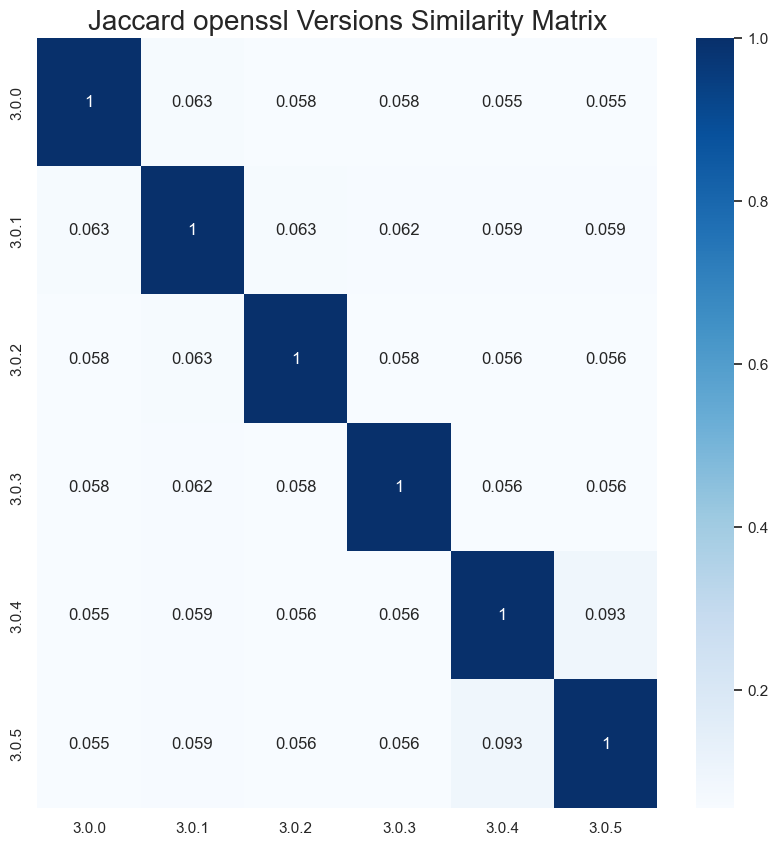

In [51]:
show_similarity_matrix(openssl_jaccard_similarities, versions, 'Jaccard openssl Versions Similarity Matrix', figsize=(10, 10), font_scale=1)

# /bin/curl comparison

In [36]:
from hashashin.lsh_tests import compute_single_bin_matrices
curl_minhash_similarities, curl_jaccard_similarities, binaries = compute_single_bin_matrices("libcurl", "curl", generate=False, regenerate=False)
minhash_metrics = compute_metrics(curl_minhash_similarities)
print(f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}")
jaccard_metrics = compute_metrics(curl_jaccard_similarities)
print(f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}")

100%|██████████| 3364/3364 [01:02<00:00, 53.86it/s]

Minhash precision: 0.9898203592814371, recall: 1.0, f1: 0.9948841408365935
Jaccard precision: 0.9981884057971016, recall: 1.0, f1: 0.9990933816863101


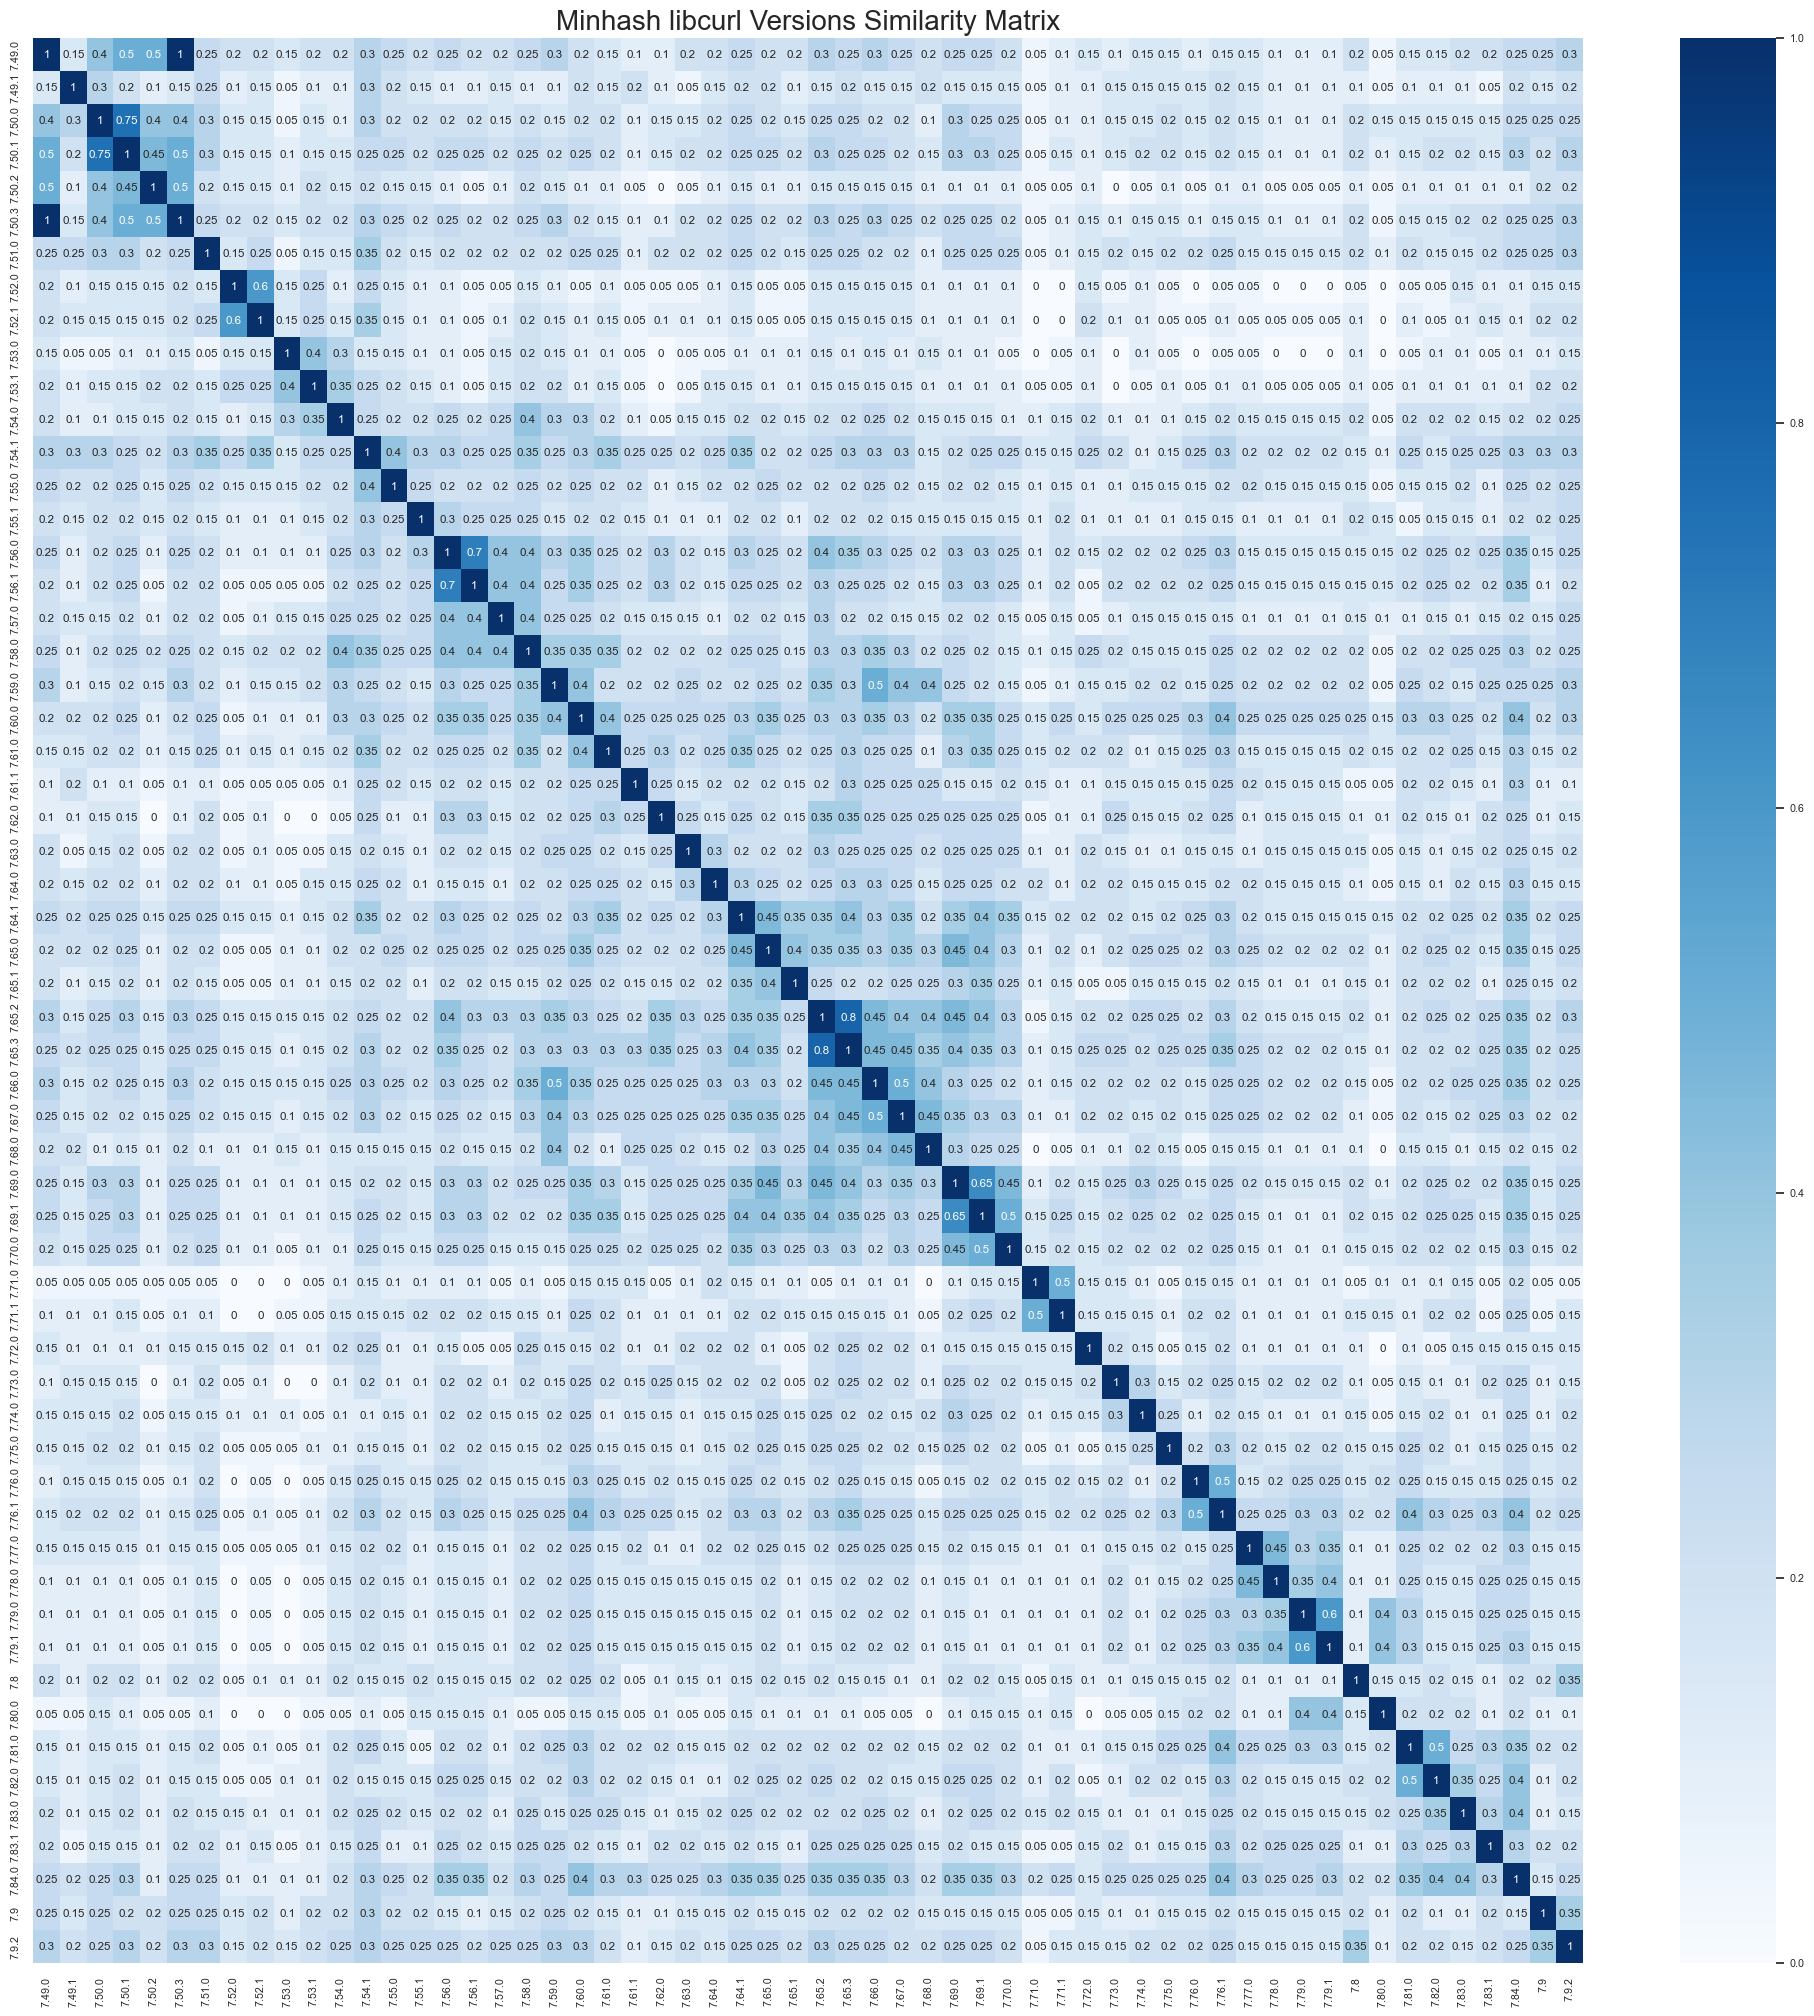

In [44]:
versions = [b.split("curl-")[1].replace('/bin/curl', '').replace('_','.') for b in binaries]
show_similarity_matrix(curl_minhash_similarities, versions, 'Minhash libcurl Versions Similarity Matrix', figsize=(25, 25))

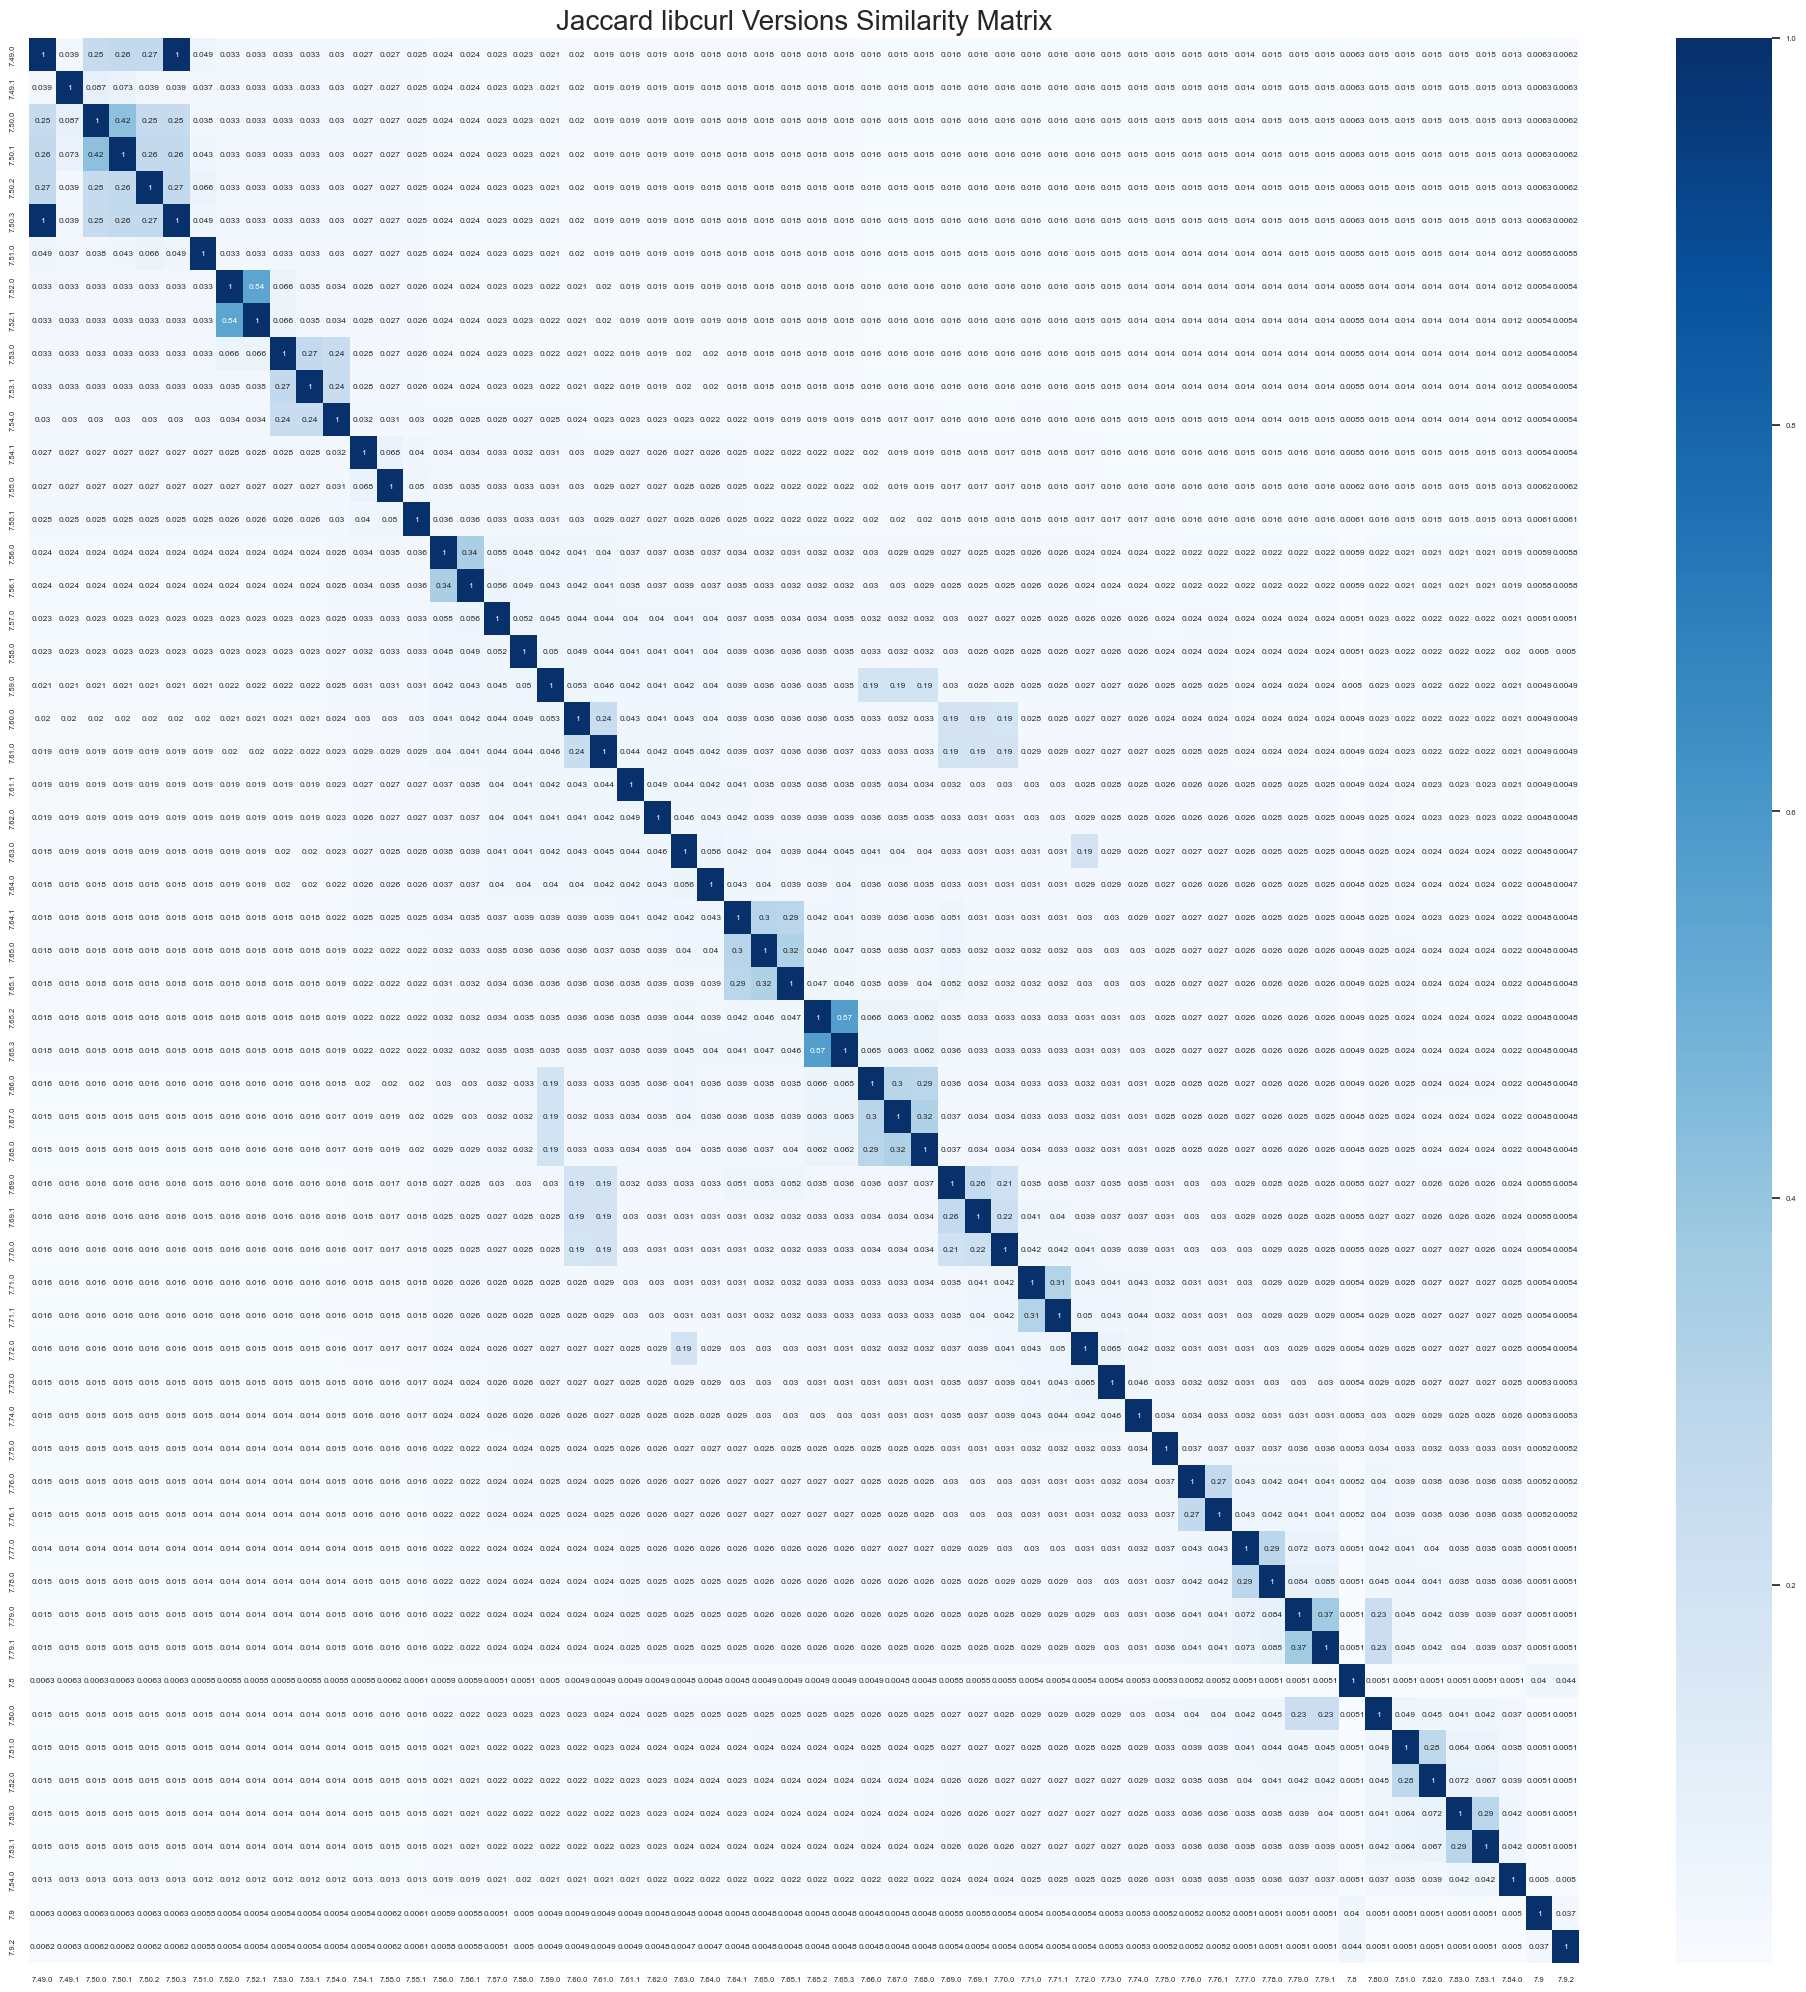

In [45]:
show_similarity_matrix(curl_jaccard_similarities, versions, 'Jaccard libcurl Versions Similarity Matrix', figsize=(25, 25), font_scale=0.5)

In [27]:
from hashashin.lsh_tests import compute_matrices
libcurl_minhash_similarities, libcurl_jaccard_similarities, binaries = compute_matrices("libcurl", generate=True, hash_progress=True, regenerate=False, version_paths="*7_[4,8][4,9]_0")
minhash_metrics = compute_metrics(libcurl_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(libcurl_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)

Globbing /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/*7_[4,8][4,9]_0
Hashing 1 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/curl-7_49_0: ['/bin/curl']
Hashing 1 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/libcurl/curl-7_84_0: ['/bin/curl']


100%|██████████| 1478/1478 [00:12<00:00, 114.52it/s]
/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/utils.py:226: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return cache_hash(


Computing similarity matrix for libcurl:
/bin/curl



100%|██████████| 1/1 [00:00<00:00, 22.43it/s]

Minhash precision: nan, recall: 0.0, f1: nan
Jaccard precision: nan, recall: 0.0, f1: nan



/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/lsh_tests.py:44: RuntimeWarning: invalid value encountered in long_scalars
  tn = (np.sum(similarity_matrix < 0.5) - np.trace(similarity_matrix < 0.5)) / (
/Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/lsh_tests.py:47: RuntimeWarning: invalid value encountered in long_scalars
  fp = (np.sum(similarity_matrix >= 0.5) - np.trace(similarity_matrix >= 0.5)) / (


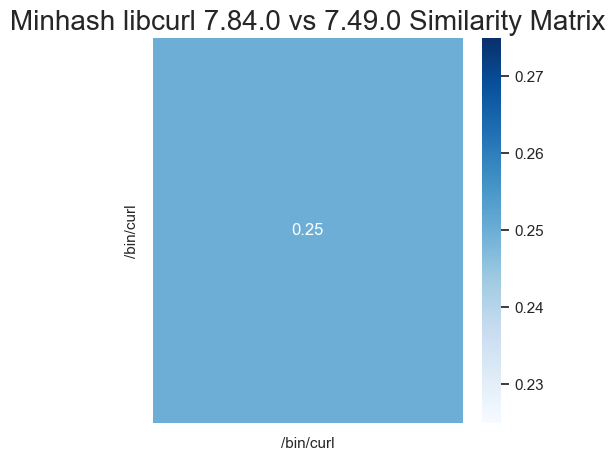

In [28]:
show_similarity_matrix(libcurl_minhash_similarities, binaries, 'Minhash libcurl 7.84.0 vs 7.49.0 Similarity Matrix', figsize=(5, 5), font_scale=1)

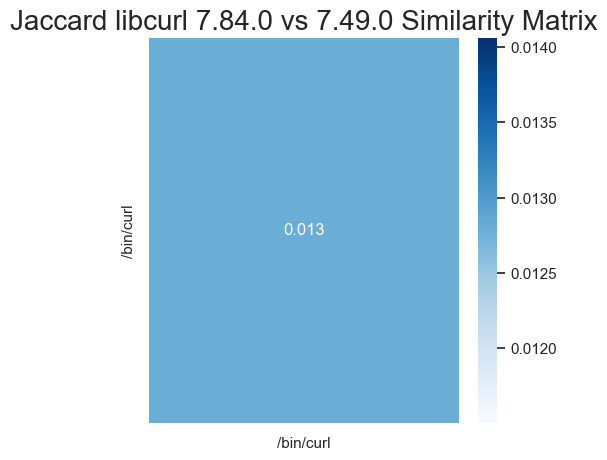

In [29]:
show_similarity_matrix(libcurl_jaccard_similarities, binaries, 'Jaccard libcurl 7.84.0 vs 7.49.0 Similarity Matrix', figsize=(5, 5), font_scale=1)

# Manual PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 128.26it/s]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 135.56it/s]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [01:52<00:00,  4.30it/s]


Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.5238095238095238, recall: 1.0, f1: 0.6875000000000001


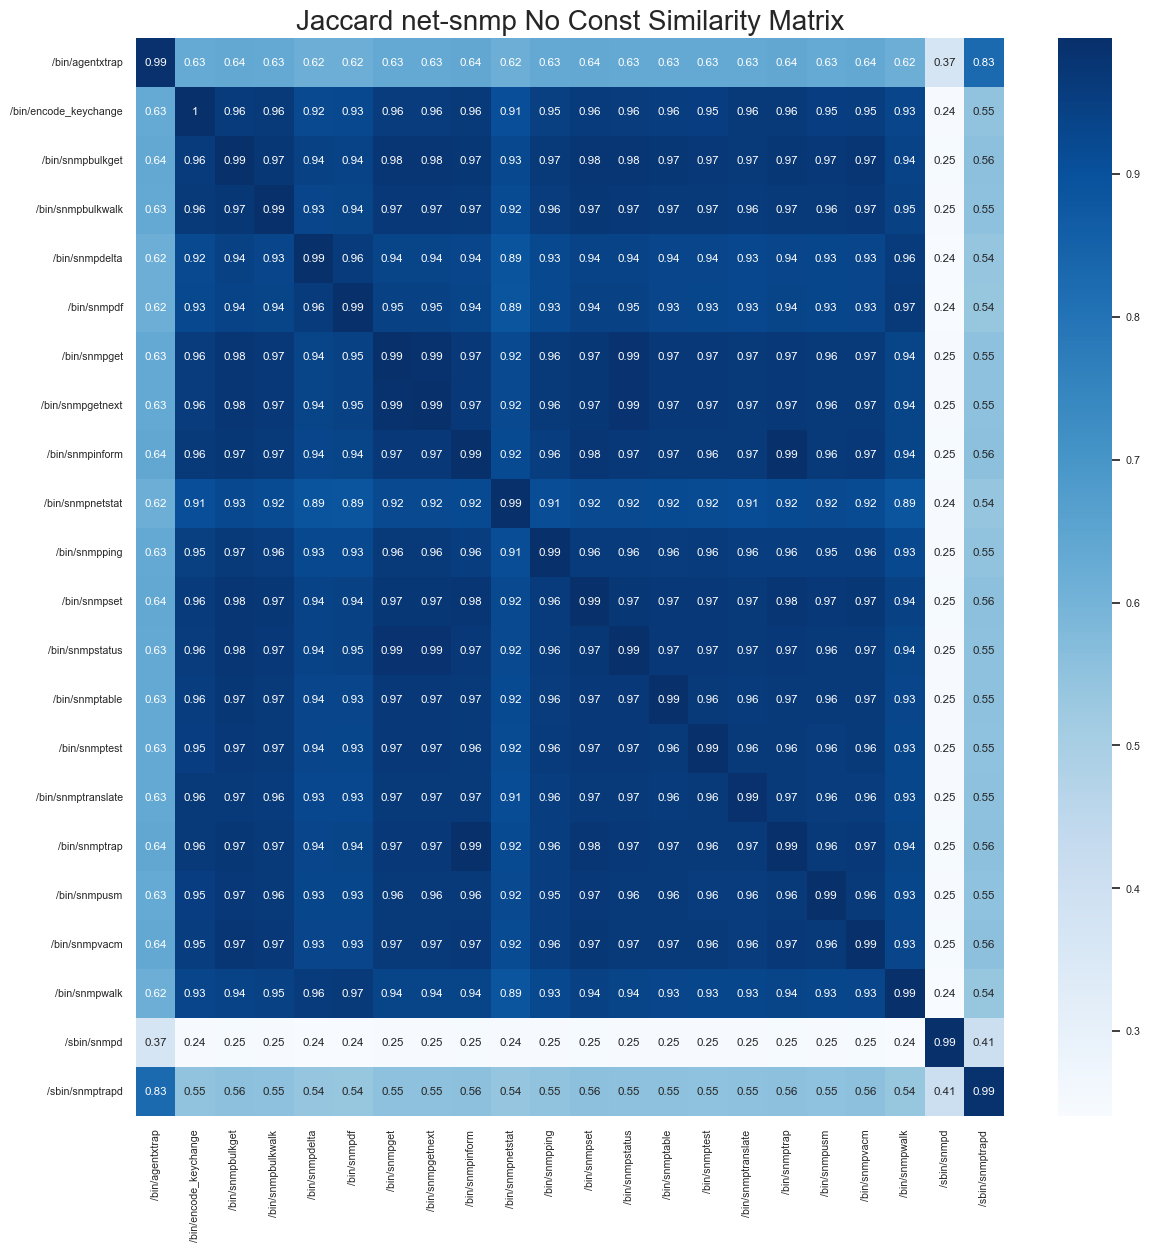

In [22]:
%load_ext autoreload
%autoreload 2
from hashashin.lsh_tests import compute_matrices, compute_metrics
from binaryninja import enums

ilen = len(enums.MediumLevelILOperation.__members__)
components = {"cyclomatic_complexity": slice(0, 1),
"num_instructions": slice(1, 2),
"num_strings": slice(2, 3),
"max_string_length": slice(3, 4),
"constants": slice(4, 68),
"strings": slice(68,580),
"histogram": slice(580, 580 + ilen),
"dominator_sig": slice(580+ilen,580+ilen+32)}

zero_minhash_similarities, zero_jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False, _feature_mask=components["constants"])
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(zero_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(zero_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)
show_similarity_matrix(zero_jaccard_similarities, binaries, 'Jaccard net-snmp No Const Similarity Matrix')

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 125.19it/s]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 121.27it/s]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [02:36<00:00,  3.10it/s]


Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


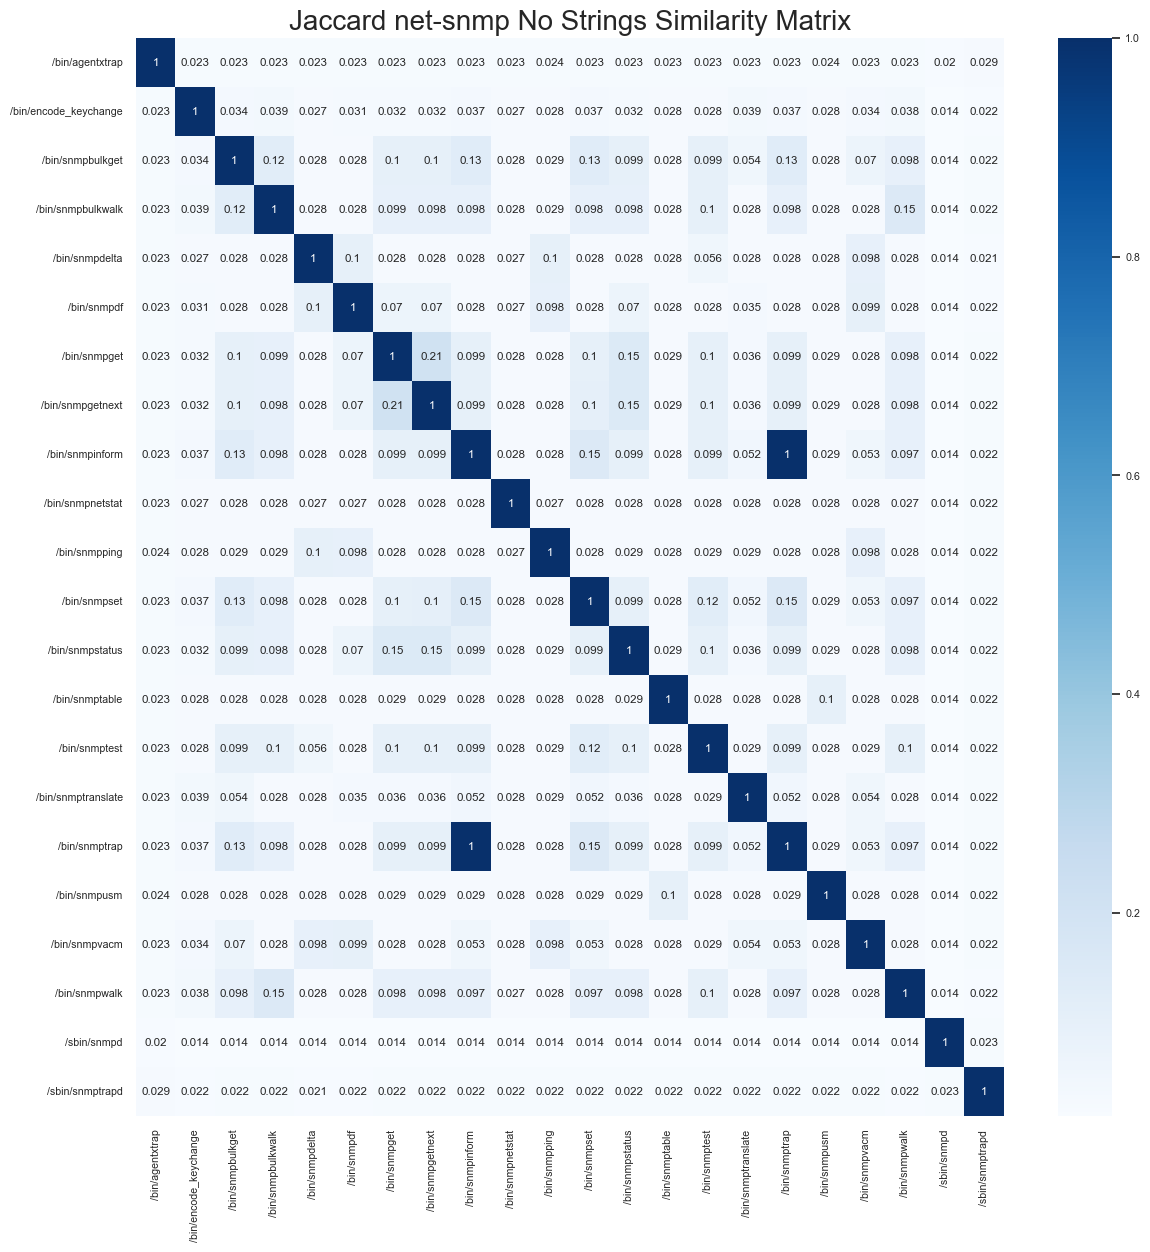

In [23]:
zero_minhash_similarities, zero_jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False, _feature_mask=components["strings"])
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(zero_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(zero_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)
show_similarity_matrix(zero_jaccard_similarities, binaries, 'Jaccard net-snmp No Strings Similarity Matrix')


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 125.34it/s]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 130.41it/s]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [01:50<00:00,  4.38it/s]


Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.9956896551724138, recall: 1.0, f1: 0.9978401727861772


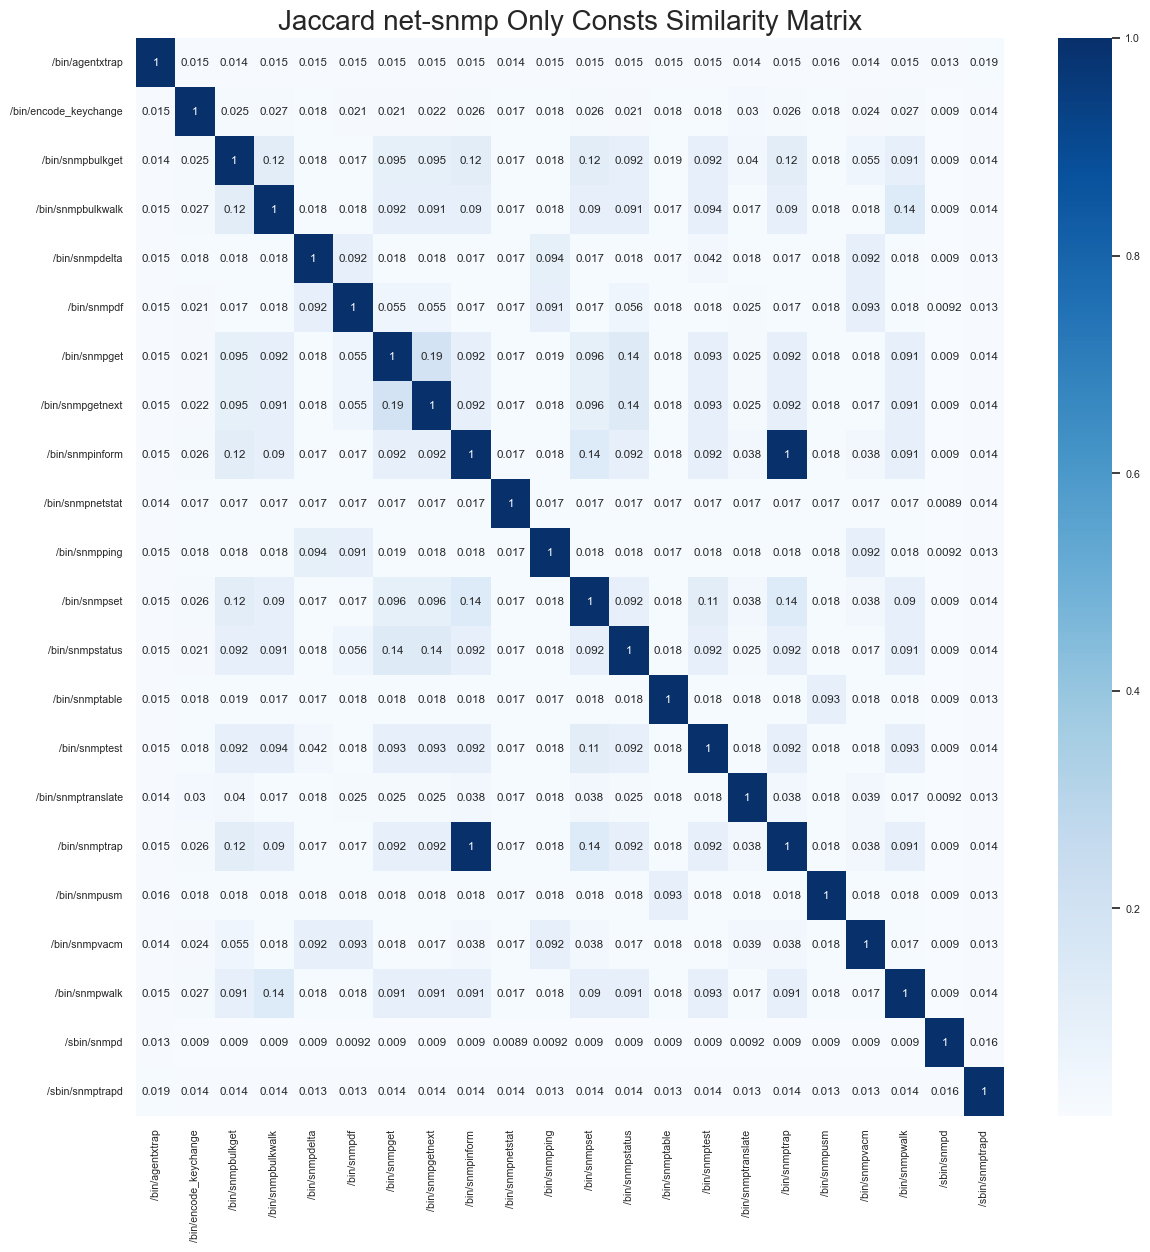

In [27]:
zero_minhash_similarities, zero_jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False, _feature_mask=slice(4, 68, 1))
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(zero_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(zero_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)
show_similarity_matrix(zero_jaccard_similarities, binaries, 'Jaccard net-snmp Only Consts Similarity Matrix')

Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.3: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 125.32it/s]


Hashing 22 binaries in /Users/jonathan.prokos/Documents/Projects/hashashin/hashashin/binary_data/net-snmp/v5.9.2: ['/bin/snmptranslate', '/bin/snmpset', '/bin/snmpdelta', '/bin/snmpinform', '/bin/snmpdf', '/bin/snmpstatus', '/bin/snmpusm', '/bin/snmpvacm', '/bin/encode_keychange', '/bin/agentxtrap', '/bin/snmpnetstat', '/bin/snmpgetnext', '/bin/snmpbulkwalk', '/bin/snmptrap', '/bin/snmpget', '/bin/snmptable', '/bin/snmpbulkget', '/bin/snmpping', '/bin/snmpwalk', '/bin/snmptest', '/sbin/snmpd', '/sbin/snmptrapd']


100%|██████████| 22/22 [00:00<00:00, 125.83it/s]


Computing similarity matrix for net-snmp:
/bin/agentxtrap,/bin/encode_keychange,/bin/snmpbulkget,/bin/snmpbulkwalk,/bin/snmpdelta,/bin/snmpdf,/bin/snmpget,/bin/snmpgetnext,/bin/snmpinform,/bin/snmpnetstat,/bin/snmpping,/bin/snmpset,/bin/snmpstatus,/bin/snmptable,/bin/snmptest,/bin/snmptranslate,/bin/snmptrap,/bin/snmpusm,/bin/snmpvacm,/bin/snmpwalk,/sbin/snmpd,/sbin/snmptrapd



100%|██████████| 484/484 [02:38<00:00,  3.05it/s]


Minhash precision: 0.9829787234042553, recall: 1.0, f1: 0.9914163090128755
Jaccard precision: 0.5473933649289099, recall: 1.0, f1: 0.7075038284839203


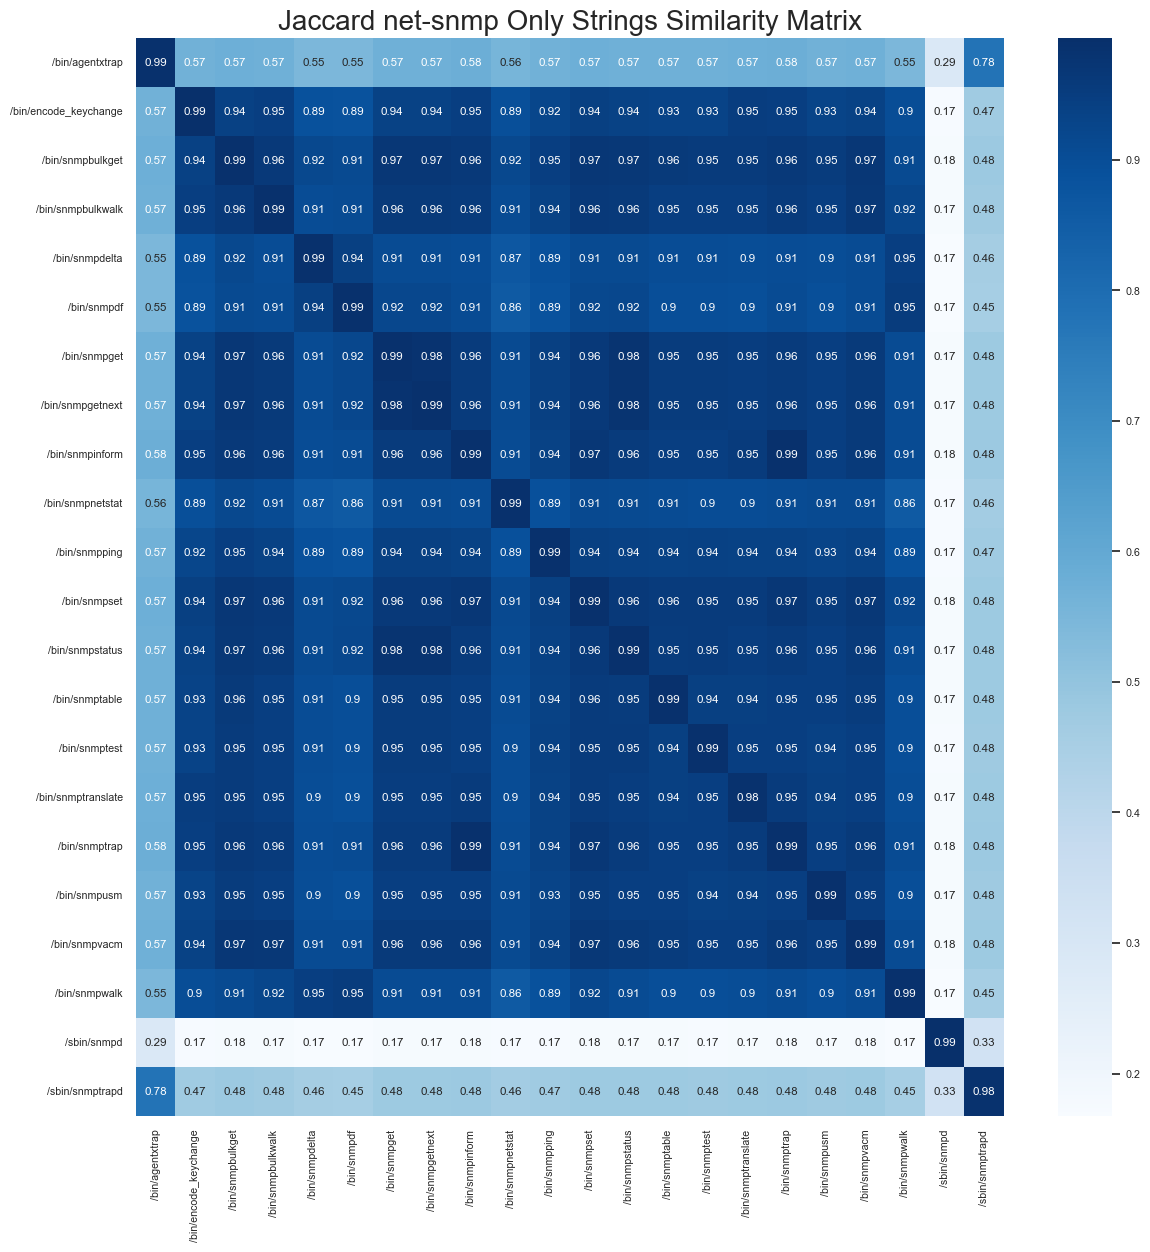

In [26]:
zero_minhash_similarities, zero_jaccard_similarities, binaries = compute_matrices("net-snmp", regenerate=False, generate=False, _feature_mask=slice(68,580,1))
# print_similarity_matrix(minhash_similarities, binaries)
# print_similarity_matrix(jaccard_similarities, binaries)
minhash_metrics = compute_metrics(zero_minhash_similarities)
print(
    f"Minhash precision: {minhash_metrics[0]}, recall: {minhash_metrics[1]}, f1: {minhash_metrics[2]}"
)
jaccard_metrics = compute_metrics(zero_jaccard_similarities)
print(
    f"Jaccard precision: {jaccard_metrics[0]}, recall: {jaccard_metrics[1]}, f1: {jaccard_metrics[2]}"
)
show_similarity_matrix(zero_jaccard_similarities, binaries, 'Jaccard net-snmp Only Strings Similarity Matrix')